<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/AA_5_04_Lab2St.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# figure size in inches
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

## 1. Load Dataset
- Load the `prime_indians_diabetes` dataset
- Check the first five samples. Are there any categorical features?
- Is this a classification or regression problem?
- Check the columns of the dataset

 There are  8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skinfold thickness (mm).
- 2-Hour serum insulin (mu U/ml).
- Body mass index (weight in kg/(height in m)^2).
- Diabetes pedigree function.
- Age (years).
- Class variable (0 or 1).

In [44]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Datasets/

data = pd.read_csv("pima_indians_diabetes.csv")
data.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Datasets


,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# show sample of the dataset
data.sample(5)

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0


In [5]:
# Check if the data set contains any null values - Nothing found!
df_datatype = pd.concat([data.dtypes, data.nunique(),
                         round(data.nunique()*100/len(data), 2),
                         data.isnull().sum(),
                         round(data.isnull().sum()*100/len(data),2)],
                        axis=1)

df_datatype.columns = ['data type',
                       'No. of categories',
                       'No. of categories %',
                       'missing values',
                       'missing values %']

df_datatype.sort_values(by='missing values %',
                        ascending=False, inplace=True)
df_datatype

,data type,No. of categories,No. of categories %,missing values,missing values %
time_pregnant_no,int64,17,2.21,0,0.0
plasma_concentration,int64,136,17.71,0,0.0
diastolic_blood_pressure,int64,47,6.12,0,0.0
triceps_skinfold_thickness,int64,51,6.64,0,0.0
serum_insulin,int64,186,24.22,0,0.0
bmi,float64,248,32.29,0,0.0
diabetes_pedigree,float64,517,67.32,0,0.0
age,int64,52,6.77,0,0.0
class,int64,2,0.26,0,0.0


In [6]:
data.shape

(768, 9)

In [7]:
data.columns

Index(['time_pregnant_no', 'plasma_concentration', 'diastolic_blood_pressure',
       'triceps_skinfold_thickness', 'serum_insulin', 'bmi',
       'diabetes_pedigree', 'age', 'class'],
      dtype='object')

 There are  8 input variables and 1 output variable. 
 
 Missing values are believed to be encoded with zero values. 
 
 The variable names are as follows:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skinfold thickness (mm).
- 2-Hour serum insulin (mu U/ml).
- Body mass index (weight in kg/(height in m)^2).
- Diabetes pedigree function.
- Age (years).
- Class variable (0 or 1).

## 2. Data Preprocessing and Model
- Assign features to `X` and target variable to `y`
- Create a pipeline for preprocessing which includes imputing and standardscaling
- Create a pipeline for preprocessor and the random forest classifier. Set `n_estimators=100`
- Train the model and make your predictions on the test dataset
- List the feature importance and the corresponding features
- Create a bar plot for the feature importances
- Drop the least important feature from the data and repeat the steps above

In [45]:
# assign features to X and target variable to y
X = data.drop(['class'], axis=1)
y = data['class']

In [46]:
# create a pipeline for preprocessing which includes imputing and standardscaling
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [47]:
# create a pipeline for preprocessor and the random forest classifier. Set n_estimators=100
classifier = RandomForestClassifier(n_estimators=100)
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

In [48]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

In [49]:
# Train the model using the training sets
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('classifier', RandomForestClassifier())])

In [50]:
# List the feature importance and the corresponding features
importances = clf.named_steps['classifier'].feature_importances_
features = X.columns

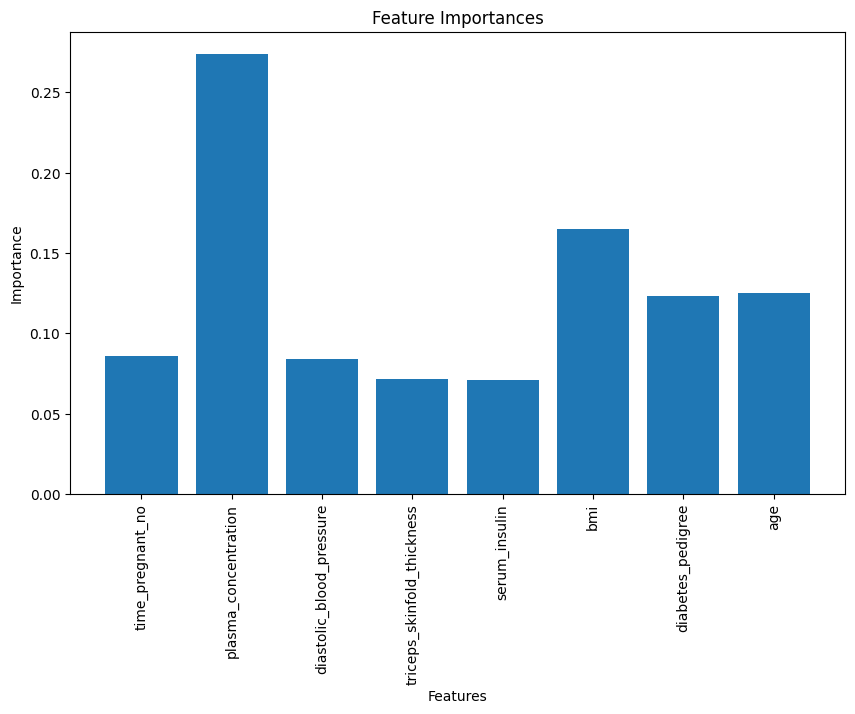

In [51]:
# Create a bar plot for the feature importances
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Feature Importances')
plt.show()

In [32]:
# Drop the least important feature from the data and repeat the steps above
least_important_feature = features[np.argmin(importances)]
X = X.drop(least_important_feature, axis=1)

In [53]:
# make predictions on the test dataset
y_pred = clf.predict(X_test)

In [54]:
# list the feature importance and the corresponding features
importances = clf.named_steps['classifier'].feature_importances_
feature_names = X.columns

In [55]:
feature_names_sorted, importances_sorted = zip(*sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True))

Text(0, 0.5, 'Feature')

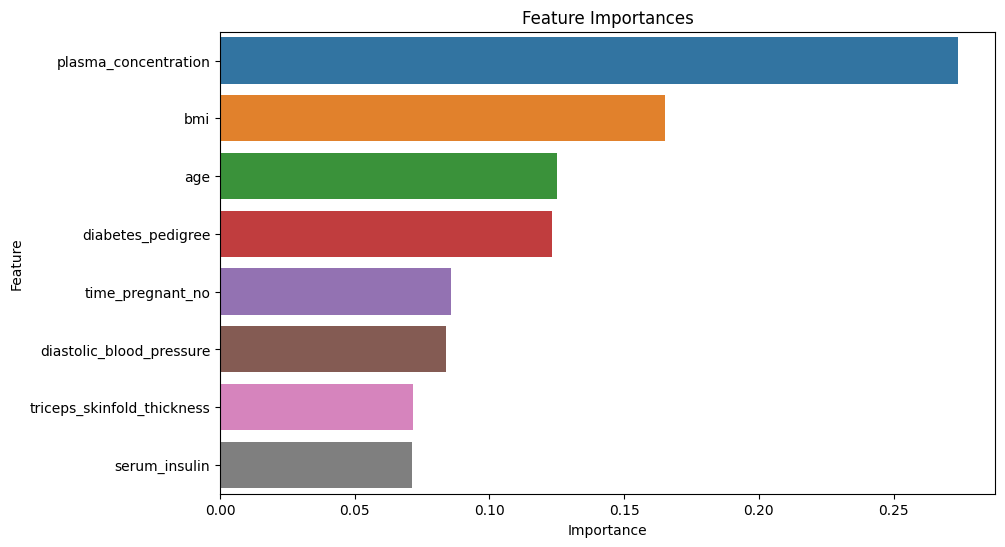

In [56]:
sns.barplot(x=list(importances_sorted), y=list(feature_names_sorted))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')


In [57]:
from sklearn.metrics import accuracy_score

# predict the labels of the test set using the trained model
y_pred = clf.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7532467532467533


#**ALTERNATIVE SOLUTION**

In [58]:
# split data into input and taget variable(s)

X = data.drop("class", axis=1)
y = data["class"]

In [59]:
# create the classifier
classifier = RandomForestClassifier(n_estimators=100)
preprocessor=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',   classifier)])
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.10, random_state=42)

# Train the model using the training sets
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('classifier', RandomForestClassifier())])

In [60]:
# predictin on the test set
y_pred = clf.predict(X_test)

In [61]:
# Calculate Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7922077922077922


In [62]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": clf["classifier"].feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
1,plasma_concentration,0.257929
5,bmi,0.157310
7,age,0.132505
6,diabetes_pedigree,0.128507
2,diastolic_blood_pressure,0.086556
4,serum_insulin,0.081649
0,time_pregnant_no,0.081448
3,triceps_skinfold_thickness,0.074097


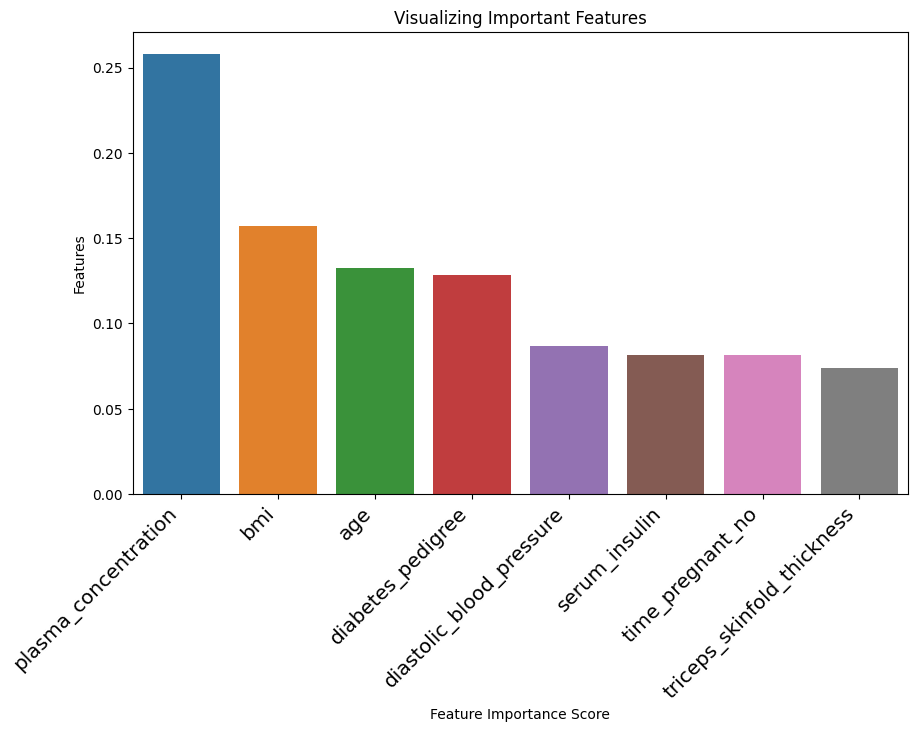

In [63]:
# visualize important featuers

# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

## Generating the Classifier on Selected Features

In [64]:
# load data with selected features
X = data.drop(["class", "triceps_skinfold_thickness"], axis=1)
y = data["class"]


In [65]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.10, random_state=42)

# Train the model using the training sets
clf.fit(X_train, y_train)

# prediction on test set
y_pred = clf.predict(X_test)

# Calculate Model Accuracy,
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7922077922077922
